# WeatherPy
----

#### Latitude - Temperature Analysis:
* Looking at the scatter plot (skewed towards the right) we can interpret that we are currently experiencing summer in the northern hemisphere. As we approach the Equinox in September, the same scatter plot will be expected to be symmetrical around the equator (0 degree latitude). 

* Additonally, we can see that there is larger variance in temperature at the latitude of 30 degree for the cities on that latitude. 

* Finally as we approach the equator the temperature becomes warmer and warmer.

#### Latitude - Humidity Analysis
* From the above scatter plot shows less correlation between latitude and humidity implying that latitude is not a good predictor for humidity.

#### Latitude - Windspeed Analysis
* From the above plot we see that there is no strong relationship between latitude and wind speed. 

* From the above plot it looks like it is more windy near the polar region compared to the equator.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [107]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


619

In [108]:
#converting cities list into a dataframe with columns for lat, lng, temp, humidity, cloudiness, windspeed
cities_df = pd.DataFrame({'Cities': cities})
cities_df.head(5)

,Cities
0,atuona
1,qasigiannguit
2,nikolskoye
3,nanortalik
4,pochutla


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [109]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"


#Printing log of city number and city name
print("Beginning Data Retrieval")
print("---------------------------")

city_number = 1

for index, row in cities_df.iterrows():
    #get city from dataframe
    cities = row["Cities"]
    
    # assemble url and make API request
    
    query_url = base_url + "&q=" + cities + "&APPID=" + api_key + "&units=imperial"
    

    try:
        response = requests.get(query_url).json()
        cities_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index,"Country"] = response["sys"]["country"]
        cities_df.loc[index,"Date"] = response["dt"]
        cities_df.loc[index,"Humidity"] = response["main"]["humidity"]
        cities_df.loc[index,"Latitude"] = response["coord"]["lat"]
        cities_df.loc[index,"Longitude"] = response["coord"]["lon"]
        cities_df.loc[index,"Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index,"Windspeed"] = response["wind"]["speed"]
        
        city_name = response["name"]
        print(f"Processing City Number {city_number} | {city_name}")
        
        city_number+=1
        
        # Adding sleep method in the loop to not over exceed rate limit of API
        time.sleep(1)
    
    except(KeyError, IndexError):
        print("City not found. Skipping...")      
  

Beginning Data Retrieval
---------------------------
Processing City Number 1 | Atuona
Processing City Number 2 | Qasigiannguit
Processing City Number 3 | Nikolskoye
Processing City Number 4 | Nanortalik
Processing City Number 5 | Pochutla
Processing City Number 6 | Chokurdakh
Processing City Number 7 | Ishinomaki
Processing City Number 8 | Paamiut
Processing City Number 9 | Talnakh
Processing City Number 10 | Tomaszow Mazowiecki
Processing City Number 11 | East London
Processing City Number 12 | Bouca
Processing City Number 13 | Castro
Processing City Number 14 | Rio Bueno
Processing City Number 15 | Yellowknife
Processing City Number 16 | Barrow
Processing City Number 17 | Iqaluit
City not found. Skipping...
Processing City Number 18 | Lavrentiya
Processing City Number 19 | Katsuura
Processing City Number 20 | Kaitangata
City not found. Skipping...
Processing City Number 21 | Turukhansk
Processing City Number 22 | Kuching
Processing City Number 23 | Ilebo
Processing City Number 24 | 

City not found. Skipping...
Processing City Number 199 | Ust-Maya
Processing City Number 200 | Vila Velha
City not found. Skipping...
Processing City Number 201 | Dalby
Processing City Number 202 | San Jose Iturbide
Processing City Number 203 | Hofn
City not found. Skipping...
Processing City Number 204 | Viedma
Processing City Number 205 | Sao Paulo de Olivenca
City not found. Skipping...
Processing City Number 206 | Narsaq
Processing City Number 207 | Yuncheng
City not found. Skipping...
Processing City Number 208 | Gainesville
Processing City Number 209 | Kendari
Processing City Number 210 | Tiksi
Processing City Number 211 | Bandarbeyla
City not found. Skipping...
Processing City Number 212 | Fengrun
Processing City Number 213 | Saint-Philippe
Processing City Number 214 | Bolobo
Processing City Number 215 | Peniche
Processing City Number 216 | Charters Towers
Processing City Number 217 | Bonthe
City not found. Skipping...
Processing City Number 218 | Ostersund
Processing City Numbe

Processing City Number 393 | Kuytun
Processing City Number 394 | Palu
Processing City Number 395 | Aasiaat
Processing City Number 396 | Barry
Processing City Number 397 | Sinnamary
City not found. Skipping...
Processing City Number 398 | Tahe
Processing City Number 399 | Almenara
Processing City Number 400 | Bukachacha
Processing City Number 401 | Killybegs
Processing City Number 402 | Carutapera
Processing City Number 403 | Taloqan
Processing City Number 404 | Kahului
Processing City Number 405 | Pangoa
Processing City Number 406 | Sahbuz
Processing City Number 407 | Jumla
Processing City Number 408 | Hualmay
Processing City Number 409 | Anchorage
Processing City Number 410 | Kamina
Processing City Number 411 | Tabuk
Processing City Number 412 | Cerkezkoy
City not found. Skipping...
Processing City Number 413 | Bauchi
Processing City Number 414 | Hovd
Processing City Number 415 | Nome
City not found. Skipping...
Processing City Number 416 | Henties Bay
Processing City Number 417 | Naj

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [110]:
cities_df.count()

Cities        619
Cloudiness    549
Country       549
Date          549
Humidity      549
Latitude      549
Longitude     549
Max Temp      549
Windspeed     549
dtype: int64

In [111]:
# Export city data to CSV
cities_df.to_csv('output_data/city_data.csv')



In [113]:
# Display data frame head 
cities_df.head(30)

#Delete/Drop NaN values from the dataframe
#Option 1: cities_df = cities_df[np.isfinite(cities_df['Cloudiness'])]
#Option 2:
cities_df = cities_df[pd.notnull(cities_df["Cloudiness"])]
cities_df


,Cities,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Windspeed
0,atuona,0.0,PF,1.562447e+09,79.0,-9.80,-139.03,80.79,17.94
1,qasigiannguit,20.0,GL,1.562447e+09,47.0,68.82,-51.19,55.40,4.70
2,nikolskoye,20.0,RU,1.562447e+09,81.0,59.70,30.79,51.80,1.97
3,nanortalik,100.0,GL,1.562447e+09,71.0,60.14,-45.24,44.18,5.84
4,pochutla,20.0,MX,1.562447e+09,52.0,15.74,-96.47,93.00,2.51
5,chokurdakh,100.0,RU,1.562447e+09,74.0,70.62,147.90,45.46,12.50
6,ishinomaki,75.0,JP,1.562447e+09,88.0,38.42,141.30,64.40,11.41
7,paamiut,87.0,GL,1.562447e+09,83.0,61.99,-49.67,44.56,1.23
8,talnakh,0.0,RU,1.562447e+09,76.0,69.49,88.39,50.00,15.66
9,tomaszow mazowiecki,0.0,PL,1.562447e+09,68.0,51.53,20.01,64.99,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

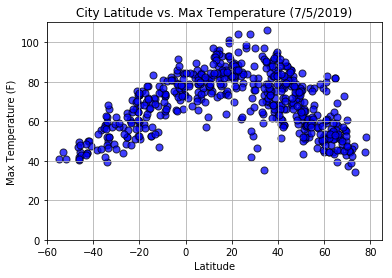

In [132]:
x_axis = cities_df['Latitude']
data = cities_df['Max Temp']

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", s=50, alpha=0.75)

plt.xlim(-60, 85)
plt.ylim(0, 110)
plt.title("City Latitude vs. Max Temperature (7/5/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Latitude_vs_Max_TempPlot.png")

plt.show()



#### Temperature - Latitude Analysis:
Looking at the scatter plot (skewed towards the right) we can interpret that we are currently experiencing summer in the northern hemisphere. As we approach the Equinox in September, the same scatter plot will be expected to be symmetrical around the equator (0 degree latitude). 

Additonally, we can see that there is larger variance in temperature at the latitude of 30 degree for the cities on that latitude. 

Finally as we approach the equator the temperature becomes warmer and warmer.

#### Latitude vs. Humidity Plot

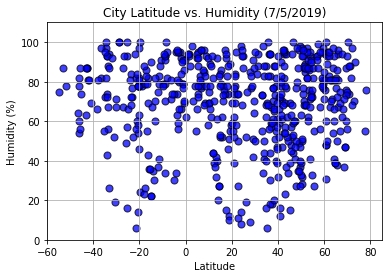

In [133]:
x_axis = cities_df['Latitude']
data = cities_df['Humidity']


plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", s=50, alpha=0.75)

plt.xlim(-60, 85)
plt.ylim(0, 110)
plt.title("City Latitude vs. Humidity (7/5/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Latitude_vs_HumidityPlot.png")

plt.show()




#### Latitude - Humidity Analysis
From the above scatter plot shows less correlation between latitude and humidity implying that latitude is not a good predictor for humidity.

#### Latitude vs. Cloudiness Plot

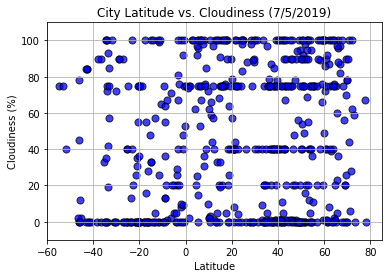

In [134]:
x_axis = cities_df['Latitude']
data = cities_df['Cloudiness']


plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", s=50, alpha=0.75)

plt.xlim(-60, 85)
plt.ylim(-10, 110)
plt.title("City Latitude vs. Cloudiness (7/5/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Latitude_vs_CloudinessPlot.png")

plt.show()



#### Latitude vs. Wind Speed Plot

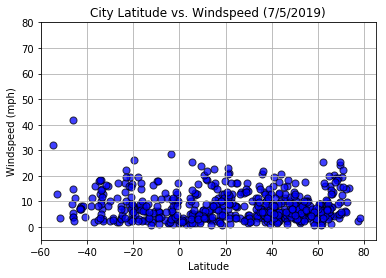

In [135]:
x_axis = cities_df['Latitude']
data = cities_df['Windspeed']


plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", s=50, alpha=0.75)

plt.xlim(-60, 85)
plt.ylim(-5, 80)
plt.title("City Latitude vs. Windspeed (7/5/2019)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid()

# Save the figure
plt.savefig("output_data/Latitude_vs_Windspeed.png")

plt.show()



#### Latitude - Windspeed Analysis
From the above plot we see that there is no strong relationship between latitude and wind speed. 

From the above plot it looks like it is more windy near the polar region compared to the equator.